# GoEmotion Dataset Exploration

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
pd.read_csv("/home/mr/Mood-Book-Recommender/SRC/Data/GoEmotions/goemotions_1.csv").head(2)

text       id       author  \
0                                    That game hurt.  eew5j0j        Brdd9   
1   >sexuality shouldn’t be a grouping category I...  eemcysk  TheGreen888   

          subreddit    link_id   parent_id   created_utc  rater_id  \
0               nrl  t3_ajis4z  t1_eew18eq  1.548381e+09         1   
1  unpopularopinion  t3_ai4q37   t3_ai4q37  1.548084e+09        37   

   example_very_unclear  admiration  ...  love  nervousness  optimism  pride  \
0                 False           0  ...     0            0         0      0   
1                  True           0  ...     0            0         0      0   

   realization  relief  remorse  sadness  surprise  neutral  
0            0       0        0        1         0        0  
1            0       0        0        0         0        0  

[2 rows x 37 columns]

In [5]:
# Load the dataset from your local path
data_path = "/home/mr/Mood-Book-Recommender/SRC/Data/GoEmotions/goemotions_1.csv"
df = pd.read_csv(data_path)


In [6]:
# 1. Basic Info
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  70000 non-null  object 
 1   id                    70000 non-null  object 
 2   author                70000 non-null  object 
 3   subreddit             70000 non-null  object 
 4   link_id               70000 non-null  object 
 5   parent_id             70000 non-null  object 
 6   created_utc           70000 non-null  float64
 7   rater_id              70000 non-null  int64  
 8   example_very_unclear  70000 non-null  bool   
 9   admiration            70000 non-null  int64  
 10  amusement             70000 non-null  int64  
 11  anger                 70000 non-null  int64  
 12  annoyance             70000 non-null  int64  
 13  approval              70000 non-null  int64  
 14  caring                70000 non-null  int64  
 15  confu

In [7]:
# 2. Display the first few rows of the dataset
print("First 5 rows:")
print(df.head())

First 5 rows:
                                                text       id  \
0                                    That game hurt.  eew5j0j   
1   >sexuality shouldn’t be a grouping category I...  eemcysk   
2     You do right, if you don't care then fuck 'em!  ed2mah1   
3                                 Man I love reddit.  eeibobj   
4  [NAME] was nowhere near them, he was by the Fa...  eda6yn6   

                author            subreddit    link_id   parent_id  \
0                Brdd9                  nrl  t3_ajis4z  t1_eew18eq   
1          TheGreen888     unpopularopinion  t3_ai4q37   t3_ai4q37   
2             Labalool          confessions  t3_abru74  t1_ed2m7g7   
3        MrsRobertshaw             facepalm  t3_ahulml   t3_ahulml   
4  American_Fascist713  starwarsspeculation  t3_ackt2f  t1_eda65q2   

    created_utc  rater_id  example_very_unclear  admiration  ...  love  \
0  1.548381e+09         1                 False           0  ...     0   
1  1.548084e+09        37 

In [8]:
# 3. Check for Missing Values
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
text                    0
id                      0
author                  0
subreddit               0
link_id                 0
parent_id               0
created_utc             0
rater_id                0
example_very_unclear    0
admiration              0
amusement               0
anger                   0
annoyance               0
approval                0
caring                  0
confusion               0
curiosity               0
desire                  0
disappointment          0
disapproval             0
disgust                 0
embarrassment           0
excitement              0
fear                    0
gratitude               0
grief                   0
joy                     0
love                    0
nervousness             0
optimism                0
pride                   0
realization             0
relief                  0
remorse                 0
sadness                 0
surprise                0
neutral                 0
dtype: int64


In [9]:
# 4. Explore Dataset Columns
print("Columns of Dataset:")
print(df.columns)

Columns of Dataset:
Index(['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id',
       'created_utc', 'rater_id', 'example_very_unclear', 'admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')


/tmp/ipykernel_3487/1768903782.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_sums_sorted.index, y=label_sums_sorted.values, palette='viridis')


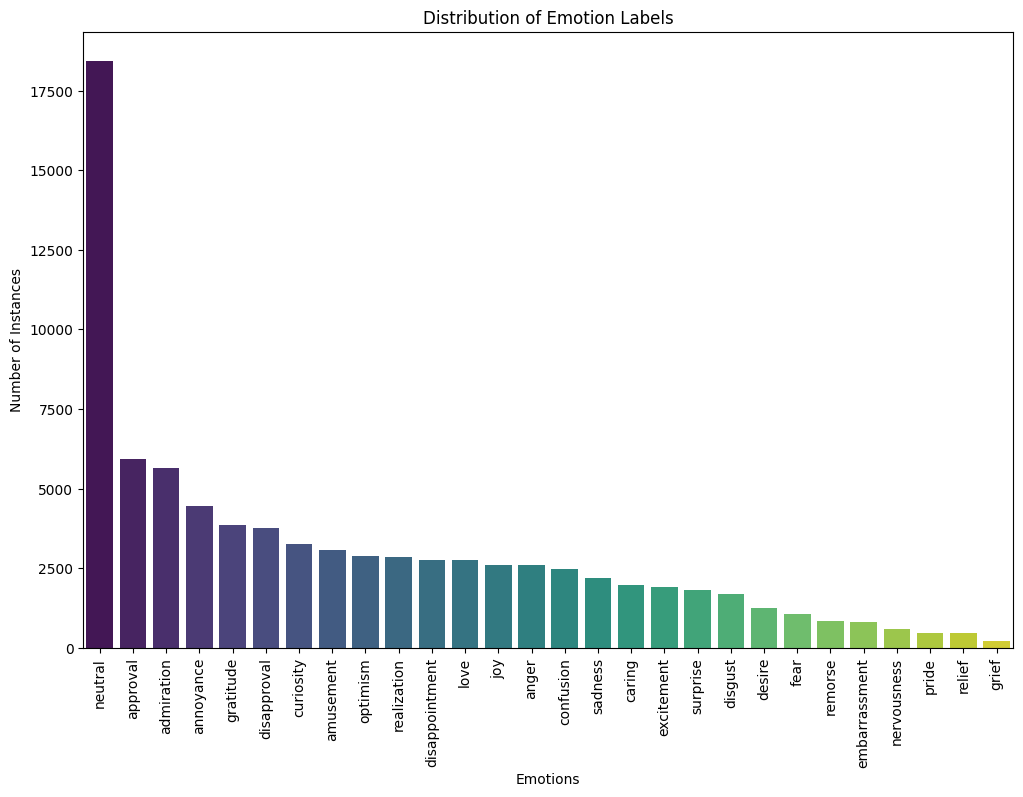

In [10]:
# 5. Distribution of Labels (excluding non-numeric columns)
# Adjust to start from the first emotion column
emotion_columns = df.columns[9:]  # Assuming text and metadata columns are excluded
label_sums = df[emotion_columns].sum()

# Sort values by the number of occurrences in descending order
label_sums_sorted = label_sums.sort_values(ascending=False)

# Plot the distribution of labels
plt.figure(figsize=(12, 8))
sns.barplot(x=label_sums_sorted.index, y=label_sums_sorted.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Emotion Labels')
plt.xlabel('Emotions')
plt.ylabel('Number of Instances')
plt.show()

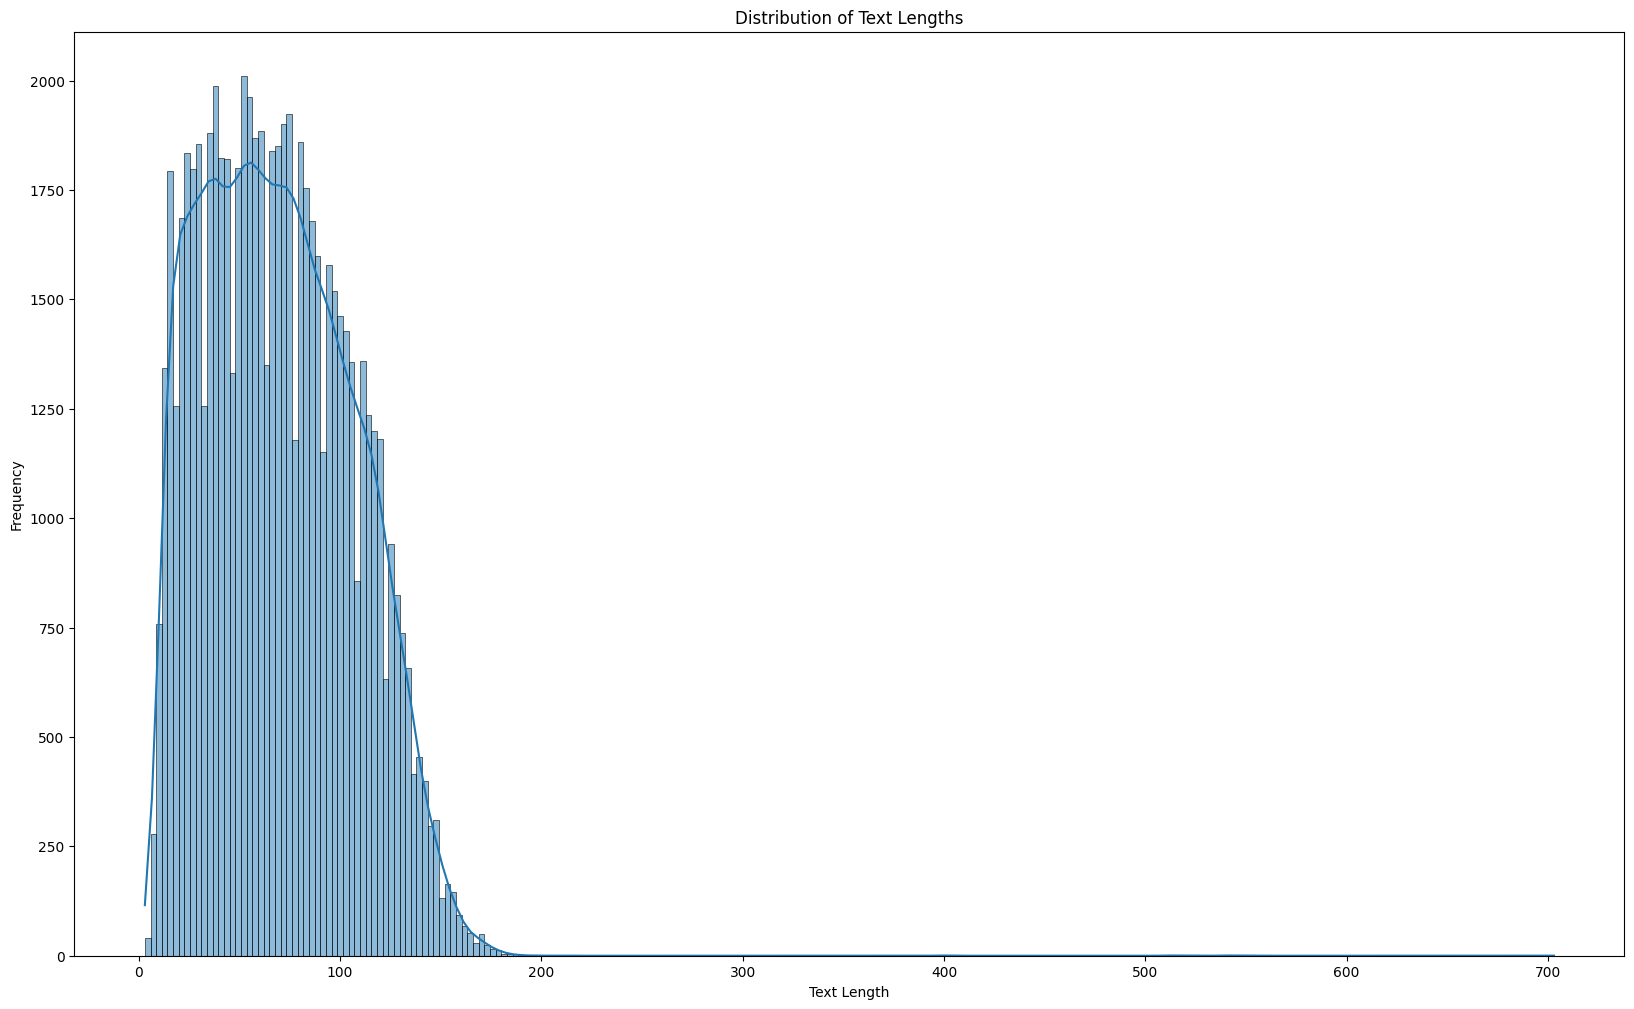

In [11]:
# 5. Add text length column for further exploration
df['text_length'] = df['text'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(20, 12))
sns.histplot(df['text_length'], kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


In [12]:
# 6. Check for Imbalanced Data
# Now that label_sums_sorted is correctly defined
label_counts = label_sums_sorted.values
imbalance_ratio = label_counts.max() / label_counts.min()
print(f"Imbalance Ratio: {imbalance_ratio}")

Imbalance Ratio: 81.15859030837004


In [13]:
# 7. Show top 5 most common emotions
print("Top 5 Emotions:")
print(label_sums_sorted.head(5))

Top 5 Emotions:
neutral       18423
approval       5928
admiration     5647
annoyance      4443
gratitude      3863
dtype: int64


In [14]:
# 8. Show top 5 most common emotions
print("Top 5 Emotions:")
print(label_sums_sorted.head(5))

Top 5 Emotions:
neutral       18423
approval       5928
admiration     5647
annoyance      4443
gratitude      3863
dtype: int64


In [15]:
# 9. Show sample text for a specific emotion (e.g., 'joy')
emotion = 'joy'  # Change this to any emotion you're interested in
sample_text = df[df[emotion] == 1].sample(1)['text'].values[0]
print(f"Sample text with emotion '{emotion}': {sample_text}")

Sample text with emotion 'joy': Why everyone mad i think it was a joke .people these days over sensitive my [NAME].


---

# MBTI Dataset Exploration

In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from collections import Counter

In [17]:
pd.read_csv("/home/mr/Mood-Book-Recommender/SRC/Data/Essays-MBTI/mbti_1.csv").head(2)

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...

In [18]:
# Download stopwords if needed
nltk.download('stopwords')

# Load the dataset
data_path = "/home/mr/Mood-Book-Recommender/SRC/Data/Essays-MBTI/mbti_1.csv"  # Update with the correct path
df = pd.read_csv(data_path)

[nltk_data] Downloading package stopwords to /home/mr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# 1. Basic Info about the Dataset
print("Dataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735 entries, 0 to 1734
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    1735 non-null   object
 1   posts   1735 non-null   object
dtypes: object(2)
memory usage: 27.2+ KB
None


In [20]:
# 2. Display the first few rows
print("First 5 rows:")
print(df.head())

First 5 rows:
   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...


In [21]:
# 3. Check for Missing Values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
type     0
posts    0
dtype: int64


In [22]:
# 4. Explore Dataset Columns
print("Columns of Dataset:")
print(df.columns)

Columns of Dataset:
Index(['type', 'posts'], dtype='object')


/tmp/ipykernel_3487/382659437.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, order=df['type'].value_counts().index, palette='viridis')


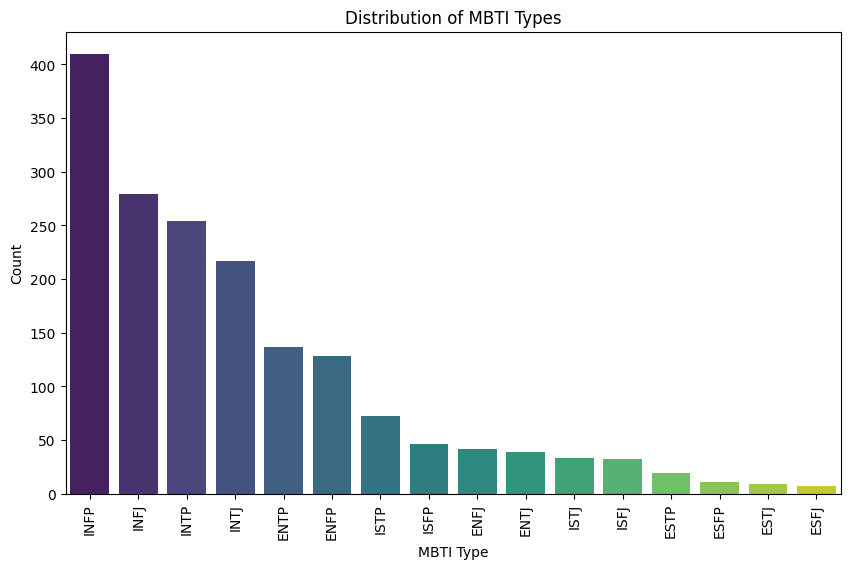

In [23]:
# 5. Distribution of MBTI Types
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df, order=df['type'].value_counts().index, palette='viridis')
plt.title('Distribution of MBTI Types')
plt.xlabel('MBTI Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

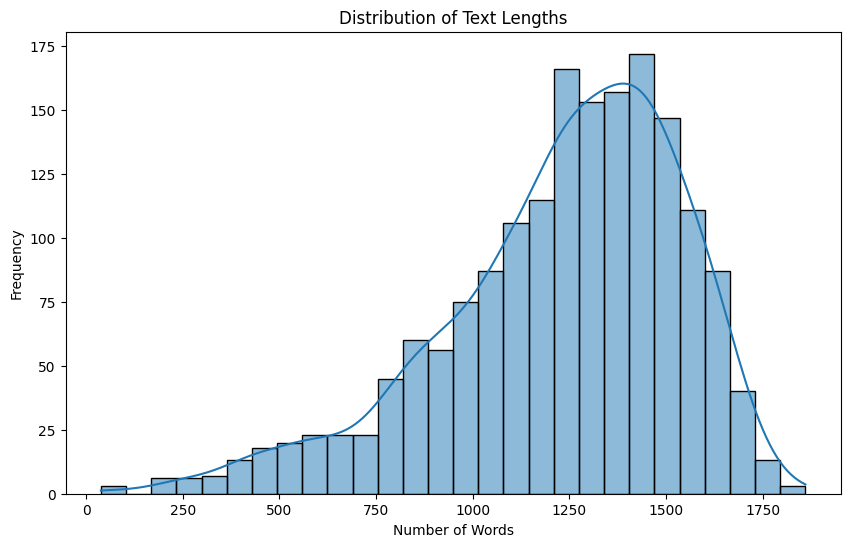

In [24]:
# 6. Add a new column for text length
df['text_length'] = df['posts'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [25]:
# 7. Most Common Words by MBTI Type (without stopwords)
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = text.lower().split()
    tokens = [word for word in tokens if word.isalpha()]  # Remove non-alphabetical tokens
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

df['processed_posts'] = df['posts'].apply(preprocess_text)

# Count the most common words per MBTI type
mbti_types = df['type'].unique()
for mbti_type in mbti_types:
    posts = df[df['type'] == mbti_type]['processed_posts'].sum()  # Concatenate all words
    word_counts = Counter(posts).most_common(10)  # Top 10 most common words
    print(f"Top 10 words for MBTI type {mbti_type}:")
    print(word_counts)


Top 10 words for MBTI type INFJ:
[('like', 2074), ('think', 1612), ('people', 1238), ('know', 1163), ('really', 1154), ('would', 1007), ('one', 952), ('feel', 930), ('get', 898), ('love', 668)]
Top 10 words for MBTI type ENTP:
[('like', 934), ('think', 689), ('people', 575), ('would', 509), ('get', 485), ('really', 435), ('one', 409), ('know', 402), ('entp', 308), ('see', 303)]
Top 10 words for MBTI type INTP:
[('like', 1808), ('think', 1353), ('people', 1166), ('would', 1100), ('one', 896), ('know', 877), ('get', 855), ('really', 807), ('much', 543), ('say', 527)]
Top 10 words for MBTI type INTJ:
[('like', 1360), ('think', 1034), ('people', 924), ('would', 837), ('know', 739), ('one', 725), ('get', 653), ('really', 581), ('intj', 496), ('time', 442)]
Top 10 words for MBTI type ENTJ:
[('like', 238), ('think', 216), ('people', 186), ('would', 154), ('get', 140), ('know', 140), ('one', 136), ('really', 106), ('entj', 89), ('see', 87)]
Top 10 words for MBTI type ENFJ:
[('like', 291), ('th

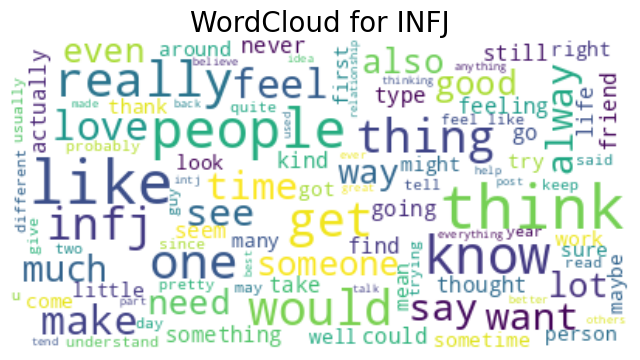

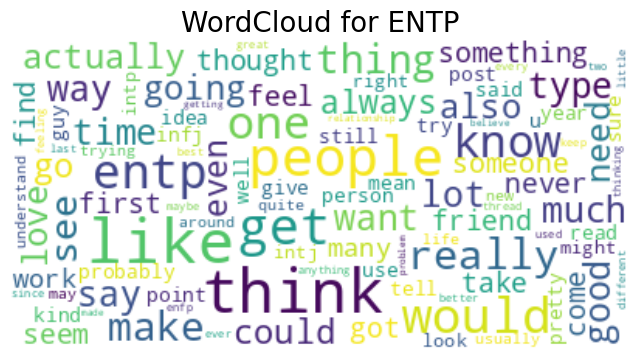

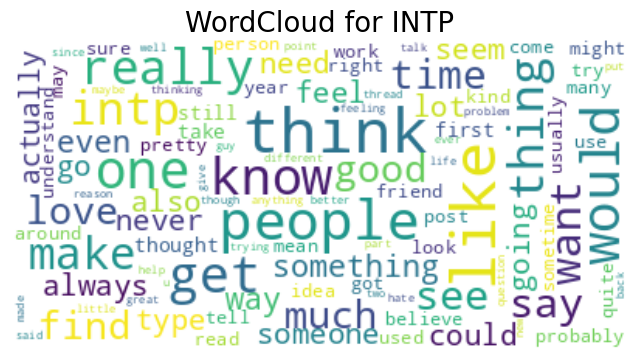

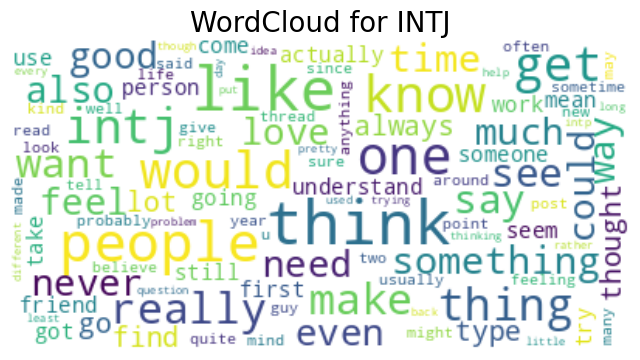

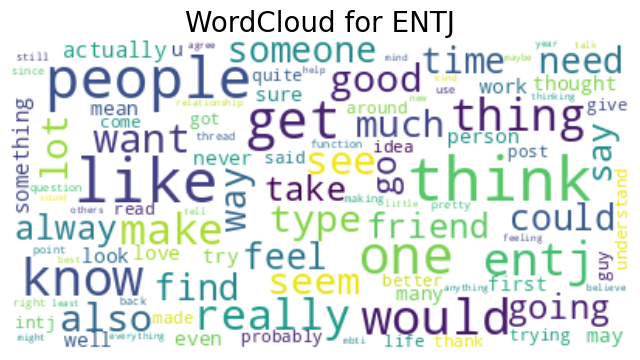

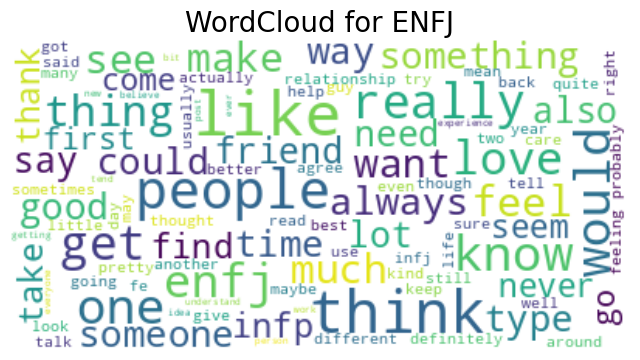

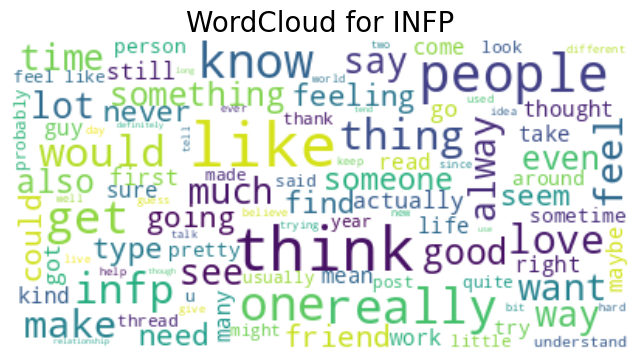

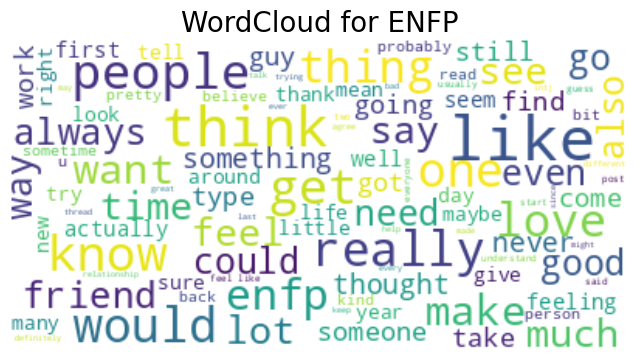

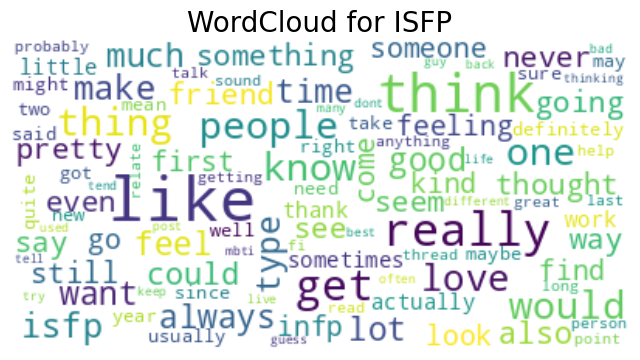

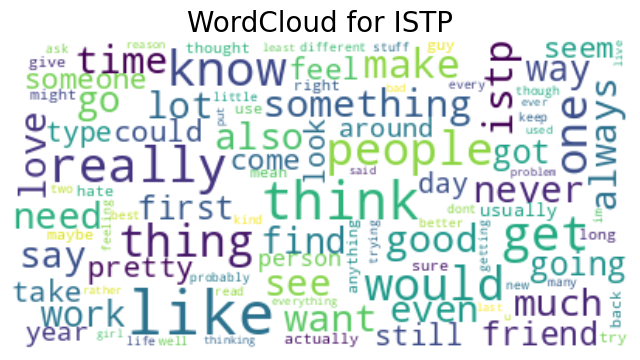

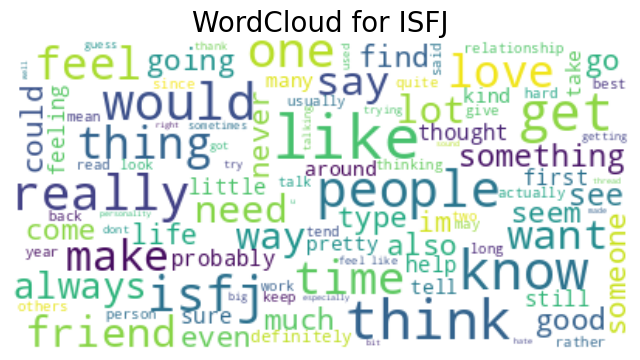

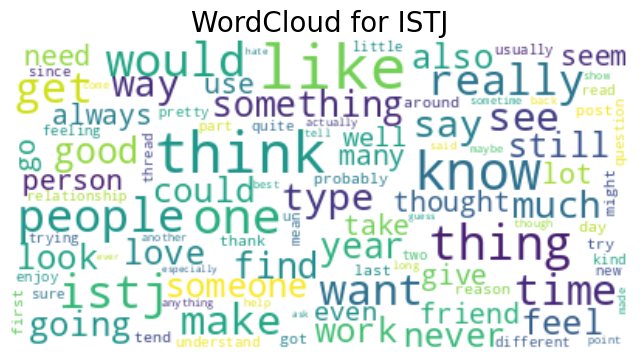

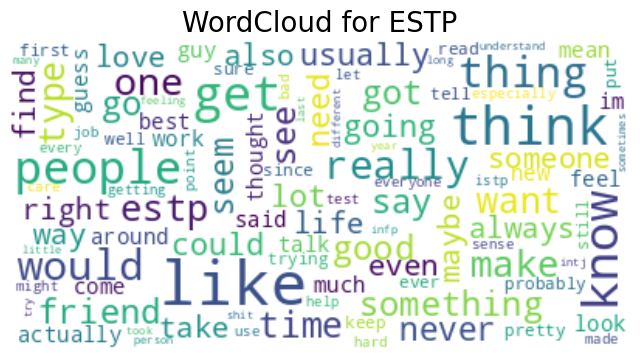

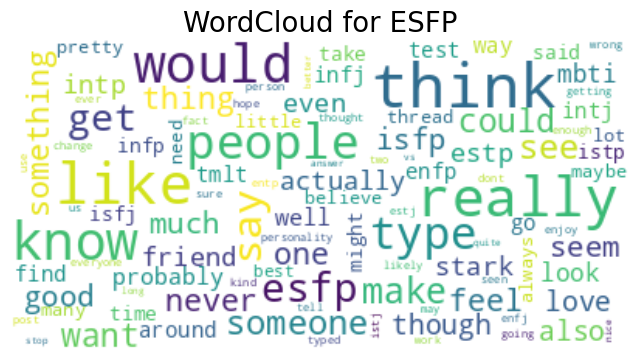

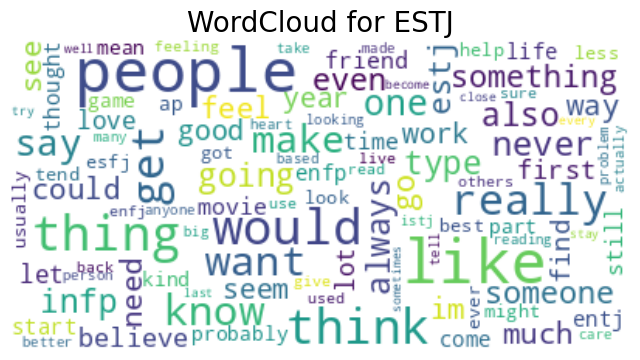

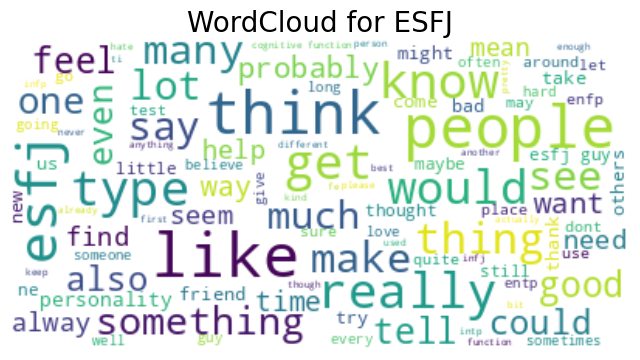

In [26]:
# 8. Visualize Word Clouds for MBTI Types
def generate_wordcloud(text, title=None):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100, max_font_size=40).generate(" ".join(text))
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title, fontsize=20)
    plt.show()

# Generate word clouds for each MBTI type
for mbti_type in mbti_types:
    posts = df[df['type'] == mbti_type]['processed_posts'].sum()  # Concatenate all words
    generate_wordcloud(posts, title=f"WordCloud for {mbti_type}")


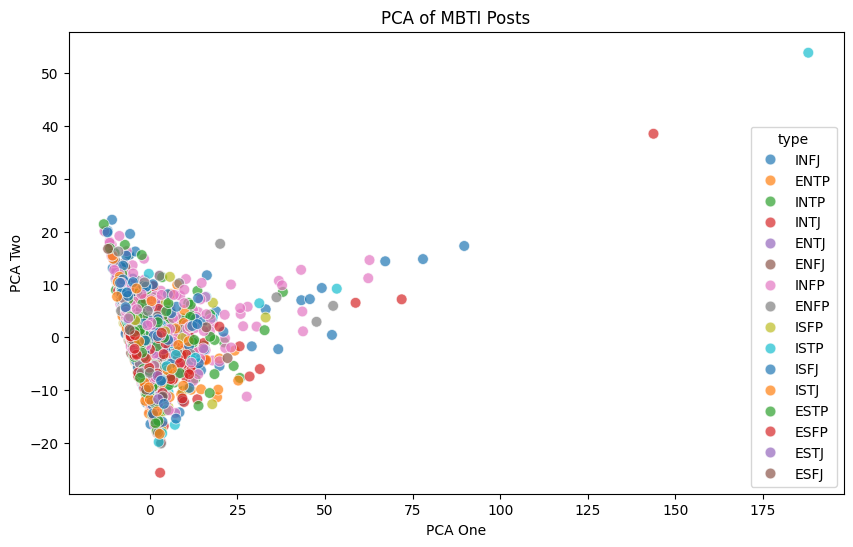

In [27]:
# 9. PCA for Dimensionality Reduction and Visualization
# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['posts'])

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X.toarray())

# Add PCA results to the dataframe
df['pca-one'] = pca_result[:, 0]
df['pca-two'] = pca_result[:, 1]

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca-one', y='pca-two', hue='type', palette='tab10', data=df, s=60, alpha=0.7)
plt.title('PCA of MBTI Posts')
plt.xlabel('PCA One')
plt.ylabel('PCA Two')
plt.show()


/tmp/ipykernel_3487/2097370286.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


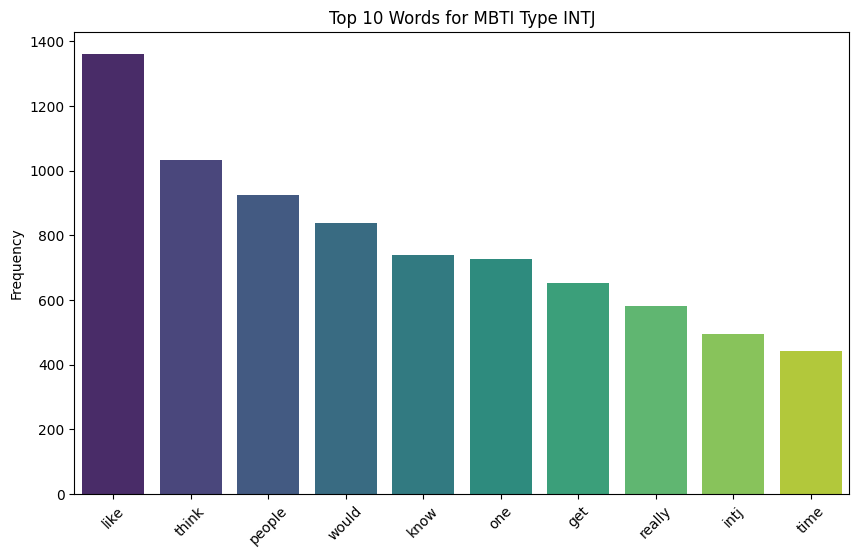

In [28]:
# 10. Word Frequency by MBTI Type
def plot_word_frequency(mbti_type, top_n=10):
    posts = df[df['type'] == mbti_type]['processed_posts'].sum()
    word_counts = Counter(posts).most_common(top_n)
    words, counts = zip(*word_counts)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(words), y=list(counts), palette='viridis')
    plt.title(f'Top {top_n} Words for MBTI Type {mbti_type}')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Example: Plot the top words for a specific MBTI type (e.g., 'INTJ')
plot_word_frequency('INTJ', top_n=10)


---

# GoodRead Dataset Exploration

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File Paths
books_path = '/home/mr/BP/Mood-Book-Recommender/src/data/Goodreads/books.csv'
ratings_path = '/home/mr/BP/Mood-Book-Recommender/src/data/Goodreads/ratings.csv'
book_tags_path = '/home/mr/BP/Mood-Book-Recommender/src/data/Goodreads/book_tags.csv'
tags_path = '/home/mr/BP/Mood-Book-Recommender/src/data/Goodreads/tags.csv'
to_read_path = '/home/mr/BP/Mood-Book-Recommender/src/data/Goodreads/to_read.csv'

# Load the datasets
books_df = pd.read_csv(books_path)
ratings_df = pd.read_csv(ratings_path)
book_tags_df = pd.read_csv(book_tags_path)
tags_df = pd.read_csv(tags_path)
to_read_df = pd.read_csv(to_read_path)

# Preview of each dataset
print("Books Data:")
print(books_df.head(), "\n")

print("Ratings Data:")
print(ratings_df.head(), "\n")

print("Book Tags Data:")
print(book_tags_df.head(), "\n")

print("Tags Data:")
print(tags_df.head(), "\n")

print("To Read Data:")
print(to_read_df.head(), "\n")


FileNotFoundError: [Errno 2] No such file or directory: '/home/mr/BP/Mood-Book-Recommender/src/data/Goodreads/books.csv'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

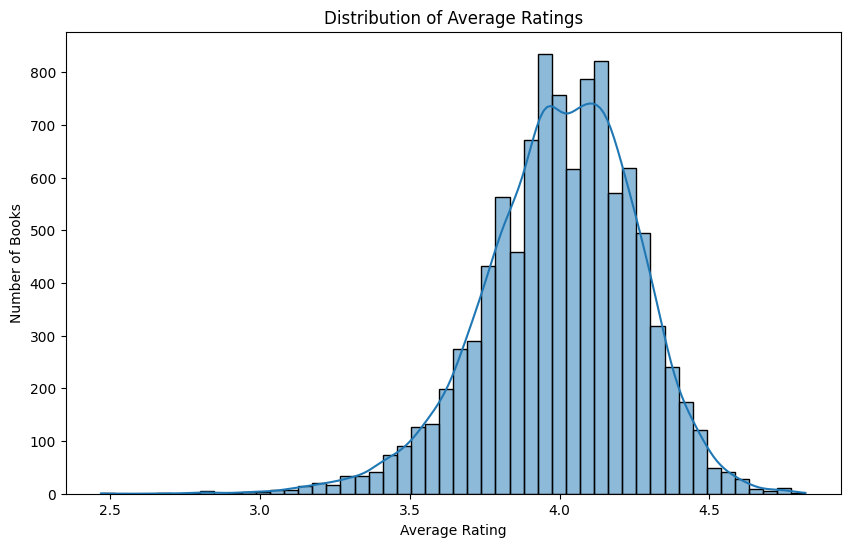

Top 10 Most Rated Books:
                                               title  ratings_count  \
0            The Hunger Games (The Hunger Games, #1)        4780653   
1  Harry Potter and the Sorcerer's Stone (Harry P...        4602479   
2                            Twilight (Twilight, #1)        3866839   
3                              To Kill a Mockingbird        3198671   
4                                   The Great Gatsby        2683664   
5                             The Fault in Our Stars        2346404   
6                                         The Hobbit        2071616   
7                             The Catcher in the Rye        2044241   
9                                Pride and Prejudice        2035490   
8              Angels & Demons  (Robert Langdon, #1)        2001311   

   average_rating  
0            4.34  
1            4.44  
2            3.57  
3            4.25  
4            3.89  
5            4.26  
6            4.25  
7            3.79  
9            

In [ ]:
# Basic info of books dataset
print(books_df.info())

# Check for missing values
print("Missing Values in Books Dataset:")
print(books_df.isnull().sum())

# Plot distribution of average ratings
plt.figure(figsize=(10,6))
sns.histplot(books_df['average_rating'], bins=50, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Books')
plt.show()

# Top 10 most rated books
top_rated_books = books_df.nlargest(10, 'ratings_count')[['title', 'ratings_count', 'average_rating']]
print("Top 10 Most Rated Books:")
print(top_rated_books)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB
None


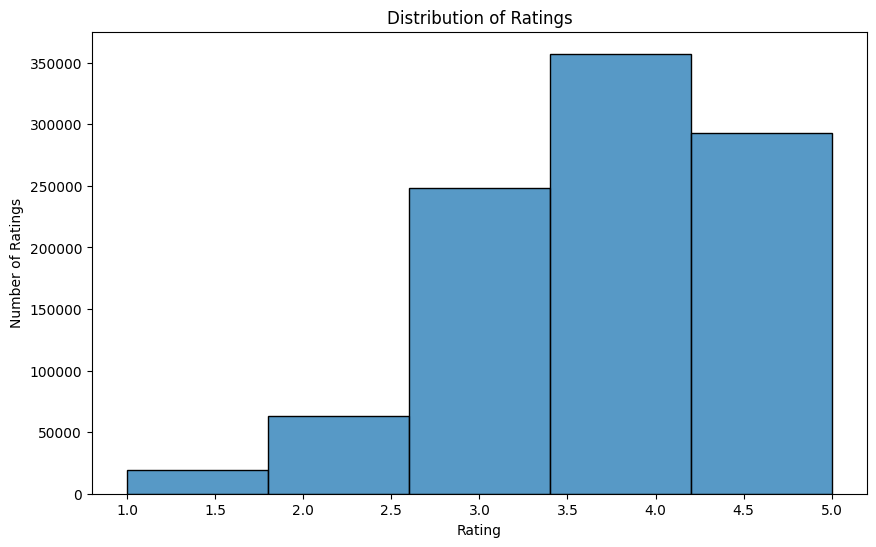

Top 10 Books with the Most Ratings:
book_id
9981    100
9977    100
9976    100
32      100
31      100
30      100
29      100
28      100
27      100
26      100
Name: count, dtype: int64


In [ ]:
# Basic info of ratings dataset
print(ratings_df.info())

# Plot distribution of ratings
plt.figure(figsize=(10,6))
sns.histplot(ratings_df['rating'], bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

# Check how many ratings per book
ratings_per_book = ratings_df['book_id'].value_counts().head(10)
print("Top 10 Books with the Most Ratings:")
print(ratings_per_book)


Top 10 Most Common Tags:
tag_name
to-read              9983
favorites            9881
owned                9858
books-i-own          9799
currently-reading    9776
library              9415
owned-books          9221
fiction              9097
to-buy               8692
kindle               8316
Name: count, dtype: int64


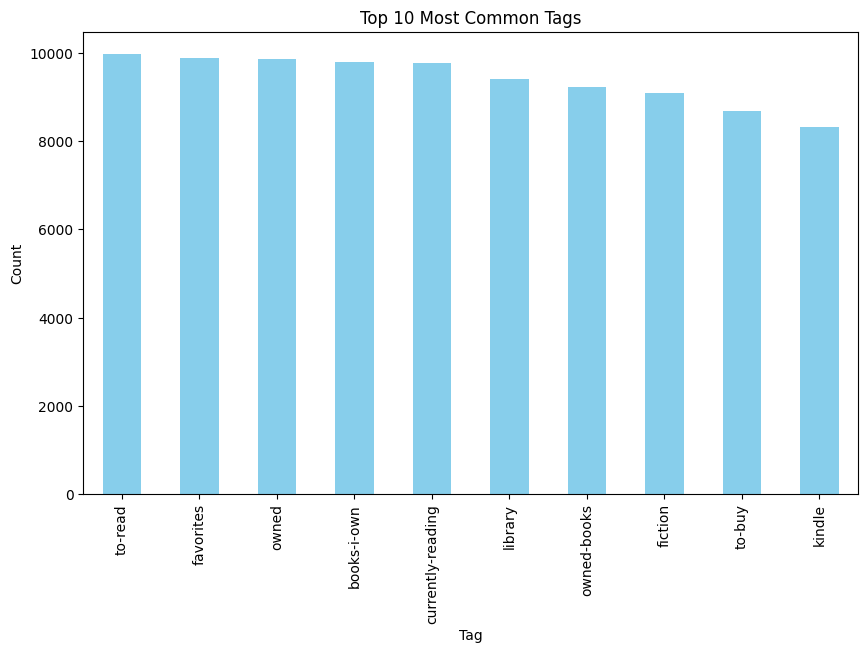

In [ ]:
# Merge book_tags with tags to get tag names
book_tags_merged = pd.merge(book_tags_df, tags_df, left_on='tag_id', right_on='tag_id')

# Top 10 most common tags
top_tags = book_tags_merged['tag_name'].value_counts().head(10)
print("Top 10 Most Common Tags:")
print(top_tags)

# Plot top 10 tags
plt.figure(figsize=(10,6))
top_tags.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Tags')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.show()


In [ ]:
# Basic info of to-read dataset
print(to_read_df.info())

# How many books are marked as 'to-read'
to_read_counts = to_read_df['book_id'].value_counts().head(10)
print("Top 10 Books Marked as To-Read:")
print(to_read_counts)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912705 entries, 0 to 912704
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  912705 non-null  int64
 1   book_id  912705 non-null  int64
dtypes: int64(2)
memory usage: 13.9 MB
None
Top 10 Books Marked as To-Read:
book_id
47     2772
143    1967
113    1840
13     1812
11     1767
45     1717
139    1650
39     1619
65     1608
35     1576
Name: count, dtype: int64
